In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    roc_auc_score,
    confusion_matrix,
    classification_report,
)
from imblearn.over_sampling import SMOTE
import pickle

In [ ]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [ ]:
df.drop("customerID", axis=1, inplace=True)

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df["TotalCharges"].fillna(df["TotalCharges"].mean(), inplace=True)
df["SeniorCitizen"] = df["SeniorCitizen"].replace({1: "Yes", 0: "No"})
df.replace(["No internet service", "No phone service"], "No", inplace=True)

<ipython-input-7-96b54e000524>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["TotalCharges"].fillna(df["TotalCharges"].mean(), inplace=True)


In [ ]:
df["avg_charge_per_month"] = df["TotalCharges"] / np.where(
    df["tenure"] == 0, 1, df["tenure"]
)

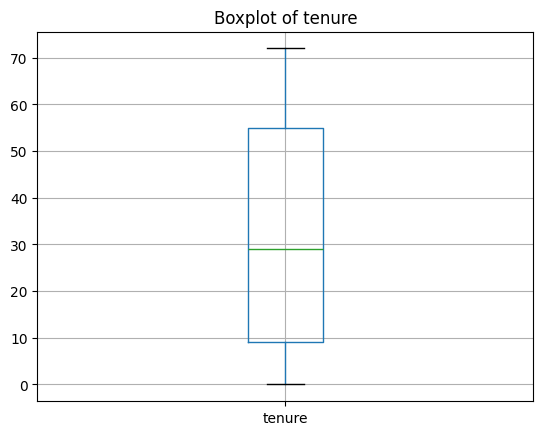

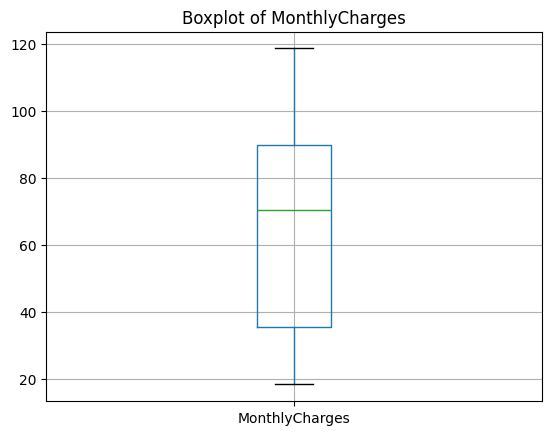

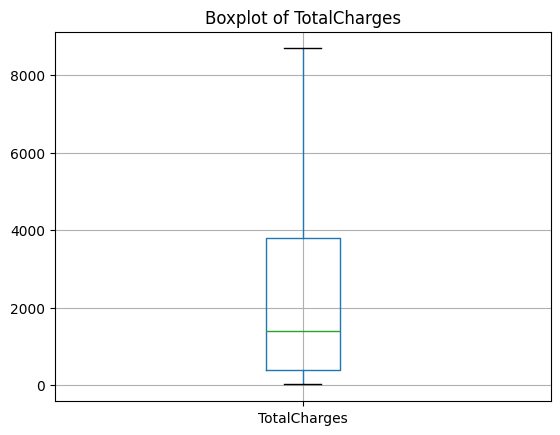

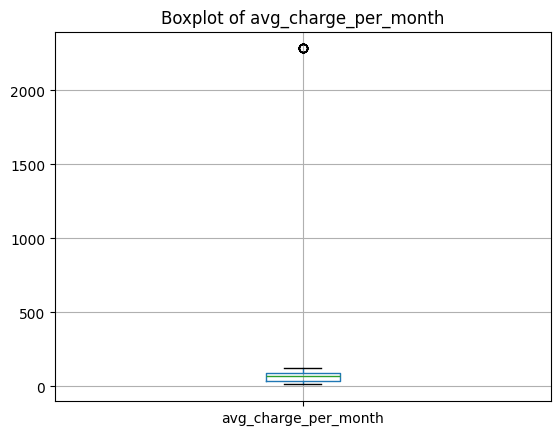

In [ ]:
numeric_col = df.select_dtypes(include=["int64", "float64"]).columns
for col in numeric_col:
    df.boxplot(column=col)
    plt.title(f"Boxplot of {col}")
    plt.show()

In [ ]:
df = pd.get_dummies(df, drop_first=True)

In [ ]:
X = df.drop("Churn_Yes", axis=1)
y = df["Churn_Yes"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

In [ ]:
scaler = StandardScaler()
numeric_cols = X_train.select_dtypes(include=["int64", "float64"]).columns
X_train = X_train.copy()
X_test = X_test.copy()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [ ]:
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    " Random Forest Classifier": RandomForestClassifier(random_state=42),
}

In [ ]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    
    roc_auc = roc_auc_score(y_test, y_proba)

    print(f"{name}")
    print(f"ROC-AUC:   {roc_auc:.4f}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("-" * 50)

Logistic Regression
ROC-AUC:   0.8357
[[1169  383]
 [ 145  416]]
              precision    recall  f1-score   support

       False       0.89      0.75      0.82      1552
        True       0.52      0.74      0.61       561

    accuracy                           0.75      2113
   macro avg       0.71      0.75      0.71      2113
weighted avg       0.79      0.75      0.76      2113

--------------------------------------------------
Decision Tree
ROC-AUC:   0.6675
[[1226  326]
 [ 256  305]]
              precision    recall  f1-score   support

       False       0.83      0.79      0.81      1552
        True       0.48      0.54      0.51       561

    accuracy                           0.72      2113
   macro avg       0.66      0.67      0.66      2113
weighted avg       0.74      0.72      0.73      2113

--------------------------------------------------
 Random Forest Classifier
ROC-AUC:   0.8187
[[1279  273]
 [ 208  353]]
              precision    recall  f1-score   sup

In [ ]:
rf = RandomForestClassifier(random_state=42)

In [ ]:
param_grid = {
    "n_estimators": [200, 300],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5],
    "class_weight": ["balanced", {0: 1, 1: 2}]
}

In [ ]:
grid_search = GridSearchCV(
    rf,
    param_grid,
    scoring="roc_auc",
    cv=5,
    n_jobs=-1,
    verbose=1
)

In [ ]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'class_weight': ['balanced', {0: 1, 1: 2}], 'max_depth': [None, 10, ...], 'min_samples_split': [2, 5], 'n_estimators': [200, 300]}"
,scoring,'roc_auc'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,300


In [ ]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'class_weight': {0: 1, 1: 2}, 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}


In [ ]:
print("Best CV ROC-AUC:", grid_search.best_score_)

Best CV ROC-AUC: 0.9273050854727394


In [ ]:
best_model = grid_search.best_estimator_

In [ ]:
y_pred_1 = best_model.predict(X_test)

In [ ]:
y_proba = best_model.predict_proba(X_test)[:, 1]

In [ ]:
print("\n Tuned Model")
print(f"Test ROC-AUC:   {roc_auc_score(y_test, y_proba):.4f}")
print(confusion_matrix(y_test, y_pred_1))
print(classification_report(y_test, y_pred_1))


 Tuned Model
Test ROC-AUC:   0.8208
[[1278  274]
 [ 209  352]]
              precision    recall  f1-score   support

       False       0.86      0.82      0.84      1552
        True       0.56      0.63      0.59       561

    accuracy                           0.77      2113
   macro avg       0.71      0.73      0.72      2113
weighted avg       0.78      0.77      0.78      2113



In [ ]:
log_reg = LogisticRegression(max_iter=3000, random_state=42)

In [ ]:
param_grid = {
    "C": [0.01, 0.1, 1, 10, 100],
    "penalty": ["l1", "l2"],
    "solver": ["liblinear", "saga"],
    "class_weight": ["balanced", {0: 1, 1: 3}],
}

In [ ]:
grid_search = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    scoring="roc_auc",
    cv=5,
    verbose=1,
    n_jobs=1,
)

In [ ]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


,estimator,LogisticRegre...ndom_state=42)
,param_grid,"{'C': [0.01, 0.1, ...], 'class_weight': ['balanced', {0: 1, 1: 3}], 'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'saga']}"
,scoring,'roc_auc'
,n_jobs,1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l1'


In [ ]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'C': 100, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}


In [ ]:
print("Best CV ROC-AUC:", grid_search.best_score_)

Best CV ROC-AUC: 0.8867351413423655


In [ ]:
best_model = grid_search.best_estimator_

In [ ]:
y_pred_1 = best_model.predict(X_test)

In [ ]:
y_proba = best_model.predict_proba(X_test)[:, 1]

In [ ]:
print("\n Tuned Model")
print(f"Test ROC-AUC:   {roc_auc_score(y_test, y_proba):.4f}")
print(confusion_matrix(y_test, y_pred_1))
print(classification_report(y_test, y_pred_1))


 Tuned Model
Test ROC-AUC:   0.8291
[[1185  367]
 [ 152  409]]
              precision    recall  f1-score   support

       False       0.89      0.76      0.82      1552
        True       0.53      0.73      0.61       561

    accuracy                           0.75      2113
   macro avg       0.71      0.75      0.72      2113
weighted avg       0.79      0.75      0.76      2113



In [ ]:
with open("best_logistic_regression.pkl", "wb") as f:
    pickle.dump(best_model, f)